In [8]:
import numpy as np
from numpy.ma import masked_values as maval
import gsw
import xarray as xr
import pandas as pd
import os
import os.path as op
from datetime import datetime, timedelta
from scipy.interpolate import PchipInterpolator as pchip
from scipy.signal import medfilt
import dask.array as dsar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm
import matplotlib.colors as clr
import matplotlib.ticker as tick
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cmocean as cmocean

%matplotlib inline

### Load ancilliary data

In [9]:
topo = xr.open_dataarray(
    "/Users/dhruvbalwada/work_root/sogos/data/processed/ETOPO1_Ice_g_gmt4_coarsened5.nc"
)

In [10]:
pf = pd.read_csv(
    op.join("/Users/dhruvbalwada/work_root/sogos/data/processed/fronts/pf.txt"),
    delim_whitespace=True,
    header=None,
    dtype=float,
    names=["lon", "lat"],
)
saf = pd.read_csv(
    op.join("/Users/dhruvbalwada/work_root/sogos/data/processed/fronts/saf.txt"),
    delim_whitespace=True,
    header=None,
    dtype=float,
    names=["lon", "lat"],
)

In [12]:
saccf = pd.read_csv(
    op.join("/Users/dhruvbalwada/work_root/sogos/data/processed/fronts/saccf.txt"),
    delim_whitespace=True,
    header=None,
    dtype=float,
    names=["lon", "lat"],
)

In [13]:
sbdy =  pd.read_csv(
    op.join("/Users/dhruvbalwada/work_root/sogos/data/processed/fronts/sbdy.txt"),
    delim_whitespace=True,
    nrows=1079,
    header=None,
    dtype=float,
    names=["lon", "lat"],
)

Looking at I06S cruise data. 
Downloaded manually from (https://cchdo.ucsd.edu/cruise/325020190403) 

In [14]:
data_folder = "/Users/dhruvbalwada/work_root/sogos/data/raw/cruise/325020190403_nc_ctd/"

In [15]:
file_names = sorted(os.listdir(data_folder))

In [16]:
cruise_dic = {}
for count, fil in enumerate(file_names):
    cruise_dic[count] = xr.open_dataset(data_folder + fil)

In [17]:
lat = [cruise_dic[key].latitude.values[0] for key in cruise_dic.keys()]
lon = [cruise_dic[key].longitude.values[0] for key in cruise_dic.keys()]
time = [cruise_dic[key].time.values[0] for key in cruise_dic.keys()]
max_pres = [cruise_dic[key].pressure.max().values for key in cruise_dic.keys()]
len_pres = [len(cruise_dic[key].pressure) for key in cruise_dic.keys()]

Text(0.5, 1.0, 'I06 2019 Cruise Track')

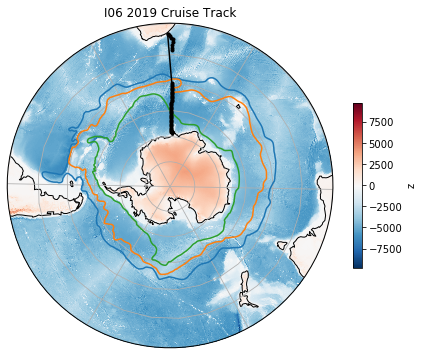

In [18]:
fig = plt.figure(figsize=(6, 6))
fig.set_tight_layout(True)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo(central_longitude=29))
ax.set_extent([-180, 180, -90, -30], ccrs.PlateCarree())

# make a circular boundary
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# Some decoration
ax.add_feature(cfeature.LAND)
ax.coastlines()
# ax.add_feature(cfeature.OCEAN)
ax.gridlines()

topo.sel(y=slice(-90, -30)).plot(
    ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.4}
)

plt.plot(saf.lon, saf.lat, transform=ccrs.PlateCarree())
plt.plot(pf.lon, pf.lat, transform=ccrs.PlateCarree())
#plt.plot(saccf.lon, saccf.lat, transform=ccrs.PlateCarree())
plt.plot(sbdy.lon, sbdy.lat, transform=ccrs.PlateCarree())

ax.plot(lon, lat, transform=ccrs.PlateCarree(), Marker=".", color="k")
plt.title("I06 2019 Cruise Track")

Text(0.5, 1.0, 'I06 2019 Cruise Track')

/Users/dhruvbalwada/code/miniconda/envs/sogos/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  func(*args, **kwargs)


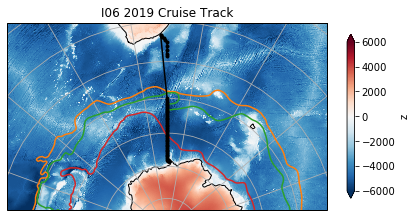

In [19]:
fig = plt.figure(figsize=(6, 6))
fig.set_tight_layout(True)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo(central_longitude=30))
ax.set_extent([-20, 80, -80, -30], ccrs.PlateCarree())

# make a circular boundary

# Some decoration
ax.add_feature(cfeature.LAND)
ax.coastlines()
# ax.add_feature(cfeature.OCEAN)
ax.gridlines()

xsel = slice(-20, 80)
ysel = slice(-80, -30)
topo.sel(y=slice(-90, -10)).plot(
    vmin=-6000, ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.4}
)

plt.plot(saf.lon, saf.lat, transform=ccrs.PlateCarree(), color='C1')
plt.plot(pf.lon, pf.lat, transform=ccrs.PlateCarree(), color='C2')
#plt.plot(saccf.lon, saccf.lat, transform=ccrs.PlateCarree())
plt.plot(sbdy.lon, sbdy.lat, transform=ccrs.PlateCarree(), color='C3')

ax.plot(lon, lat, transform=ccrs.PlateCarree(), Marker=".", color="k")

plt.title("I06 2019 Cruise Track")

Text(0.5, 1.0, 'I06 2019 Cruise Track')

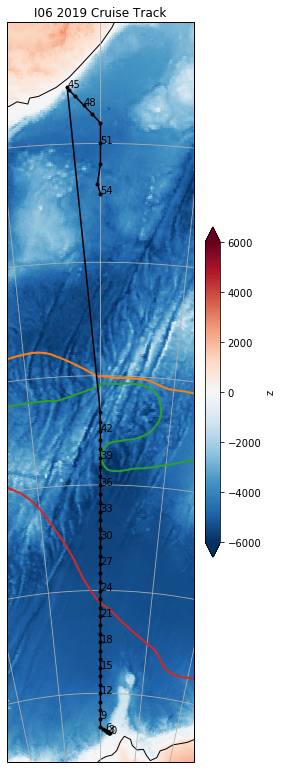

In [20]:
fig = plt.figure(figsize=(4, 12))
fig.set_tight_layout(True)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo(central_longitude=30))
ax.set_extent([25, 35, -70, -30], ccrs.PlateCarree())

# make a circular boundary

# Some decoration
ax.add_feature(cfeature.LAND)
ax.coastlines()
# ax.add_feature(cfeature.OCEAN)
ax.gridlines()

xsel = slice(-20, 80)
ysel = slice(-80, -30)
topo.sel(y=slice(-90, -10)).plot(
    vmin=-6000, ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={"shrink": 0.4}
)

plt.plot(saf.lon, saf.lat, transform=ccrs.PlateCarree(), linewidth=2, color='C1')
plt.plot(pf.lon, pf.lat, transform=ccrs.PlateCarree(), linewidth=2, color='C2')
#plt.plot(saccf.lon, saccf.lat, transform=ccrs.PlateCarree())
plt.plot(sbdy.lon, sbdy.lat, transform=ccrs.PlateCarree(), linewidth=2, color='C3')

ax.plot(lon, lat, transform=ccrs.PlateCarree(), Marker=".", color="k")

for i in range(0, len(lat), 3):
    ax.text(lon[i], lat[i], i, transform=ccrs.PlateCarree(), color="k")

plt.title("I06 2019 Cruise Track")

In [21]:
cruise_dic

{0: <xarray.Dataset>
 Dimensions:          (latitude: 1, longitude: 1, pressure: 261, time: 1)
 Coordinates:
   * pressure         (pressure) float64 0.0 2.0 4.0 6.0 ... 516.0 518.0 520.0
   * time             (time) datetime64[ns] 2019-04-16T02:07:00
   * latitude         (latitude) float32 -68.3422
   * longitude        (longitude) float32 31.535
 Data variables:
     pressure_QC      (pressure) int16 ...
     temperature      (pressure) float64 ...
     temperature_QC   (pressure) int16 ...
     salinity         (pressure) float64 ...
     salinity_QC      (pressure) int16 ...
     oxygen           (pressure) float64 ...
     oxygen_QC        (pressure) int16 ...
     CTDXMISS         (pressure) float64 ...
     CTDXMISS_QC      (pressure) int16 ...
     CTDFLUOR         (pressure) float64 ...
     CTDFLUOR_QC      (pressure) int16 ...
     CTDBBP700RAW     (pressure) float64 ...
     CTDBBP700RAW_QC  (pressure) int16 ...
     woce_date        (time) int32 ...
     woce_time        

In [22]:
cruise_dic[i].latitude > -66

<xarray.DataArray 'latitude' (latitude: 1)>
array([ True])
Coordinates:
  * latitude  (latitude) float32 -38.49942

In [23]:
# find max pressure
Pmax = max(max_pres)

In [24]:
Pint = np.linspace(0, Pmax, int(Pmax / 2) + 1)
Pint

array([0.000e+00, 2.000e+00, 4.000e+00, ..., 5.836e+03, 5.838e+03,
       5.840e+03])

In [25]:
# Calculate some gibbs sea water variables
for i in cruise_dic.keys():
    cruise_dic[i] = xr.merge(
        [
            cruise_dic[i],
            xr.DataArray(
                gsw.SA_from_SP(
                    cruise_dic[i].salinity,
                    cruise_dic[i].pressure,
                    cruise_dic[i].longitude,
                    cruise_dic[i].latitude,
                ),
                dims="pressure",
            ).rename("SA"),
        ]
    )

    cruise_dic[i] = xr.merge(
        [
            cruise_dic[i],
            xr.DataArray(
                gsw.CT_from_t(
                    cruise_dic[i].SA, cruise_dic[i].temperature, cruise_dic[i].pressure
                ),
                dims="pressure",
            ).rename("CT"),
        ]
    )

    cruise_dic[i] = xr.merge(
        [
            cruise_dic[i],
            xr.DataArray(
                gsw.sigma0(cruise_dic[i].SA, cruise_dic[i].CT), dims="pressure"
            ).rename("sigma0"),
        ]
    )

In [26]:
Tint = np.stack(
    [
        cruise_dic[key]
        .CT.where(cruise_dic[key].temperature_QC == 2)
        .interp(pressure=Pint)
        .values
        for key in cruise_dic.keys()
    ],
    axis=0,
)

In [27]:
Sint = np.stack(
    [
        cruise_dic[key]
        .SA.where(cruise_dic[key].salinity_QC == 2)
        .interp(pressure=Pint)
        .values
        for key in cruise_dic.keys()
    ],
    axis=0,
)
sigma0int = np.stack(
    [
        cruise_dic[key]
        .sigma0.where(cruise_dic[key].salinity_QC == 2)
        .interp(pressure=Pint)
        .values
        for key in cruise_dic.keys()
    ],
    axis=0,
)
OXYint = np.stack(
    [
        cruise_dic[key]
        .oxygen.where(cruise_dic[key].oxygen_QC == 2)
        .interp(pressure=Pint)
        .values
        for key in cruise_dic.keys()
    ],
    axis=0,
)
FLUORint = np.stack(
    [
        cruise_dic[key]
        .CTDFLUOR.where(cruise_dic[key].CTDFLUOR_QC == 1)
        .interp(pressure=Pint)
        .values
        for key in cruise_dic.keys()
    ],
    axis=0,
)
BBPint = np.stack(
    [
        cruise_dic[key]
        .CTDBBP700RAW.where(cruise_dic[key].CTDBBP700RAW_QC == 1)
        .interp(pressure=Pint)
        .values
        for key in cruise_dic.keys()
    ],
    axis=0,
)

In [28]:
cruise_ds_int = xr.Dataset(
    {
        "temperature": (["cast_num", "pressure"], Tint),
        "salinity": (["cast_num", "pressure"], Sint),
        "oxygen": (["cast_num", "pressure"], OXYint),
        "fluor": (["cast_num", "pressure"], FLUORint),
        "BBP": (["cast_num", "pressure"], BBPint),
        "sigma0": (["cast_num", "pressure"], sigma0int),
    },
    coords={
        "lon": (["cast_num"], lon),
        "lat": (["cast_num"], lat),
        "time": (["cast_num"], time),
        "pressure": (["pressure"], Pint),
    },
)

In [29]:
# make a gridded density (Sigma0) for  plotting on TS plots
Tpts = np.linspace(-3, 20, 40)
Spts = np.linspace(33.5, 36, 41)
[Tg, Sg] = np.meshgrid(Tpts, Spts)
rhoTS = gsw.sigma0(Sg, Tg)

(-2, 6)

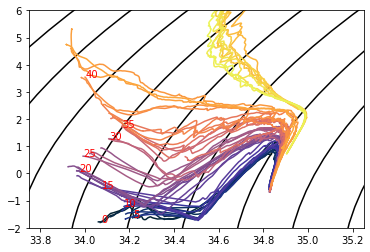

In [30]:
plt.contour(Sg, Tg, rhoTS, levels=30, colors="k")
ncasts = len(cruise_ds_int.cast_num)
for n in range(ncasts):
    plt.plot(
        cruise_ds_int.isel(cast_num=n).salinity.T,
        cruise_ds_int.isel(cast_num=n).temperature.T,
        color=cmocean.cm.thermal(n / ncasts),
    )

for n in range(0, 44, 5):
    plt.text(
        cruise_ds_int.isel(cast_num=n).salinity[10],
        cruise_ds_int.isel(cast_num=n).temperature[10],
        n,
        color="r",
    )

plt.xlim([33.75, 35.25])
plt.ylim([-2, 6])

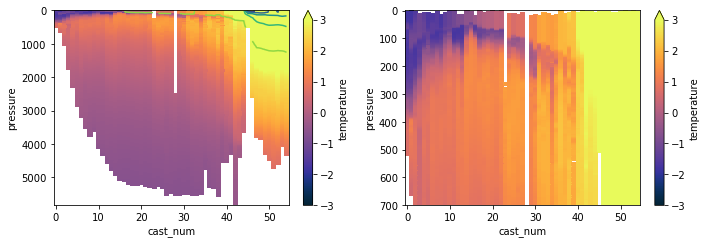

In [31]:
plt.figure(figsize=(10, 3.5))

plt.subplot(121)
cruise_ds_int.temperature.T.plot(vmax=3, cmap=cmocean.cm.thermal)
cruise_ds_int.sigma0.T.plot.contour()
plt.gca().invert_yaxis()

plt.subplot(122)
cruise_ds_int.sel(pressure=slice(0, 700)).temperature.T.plot(
    vmax=3, cmap=cmocean.cm.thermal
)
plt.gca().invert_yaxis()
plt.tight_layout()

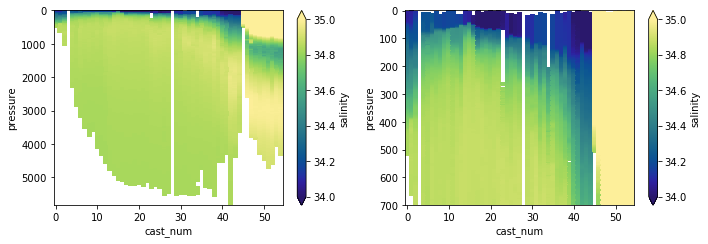

In [32]:
plt.figure(figsize=(10, 3.5))

plt.subplot(121)
cruise_ds_int.salinity.T.plot(vmin=34, vmax=35, cmap=cmocean.cm.haline)
plt.gca().invert_yaxis()

plt.subplot(122)
cruise_ds_int.sel(pressure=slice(0, 700)).salinity.T.plot(
    vmin=34, vmax=35, cmap=cmocean.cm.haline
)
plt.gca().invert_yaxis()
plt.tight_layout()

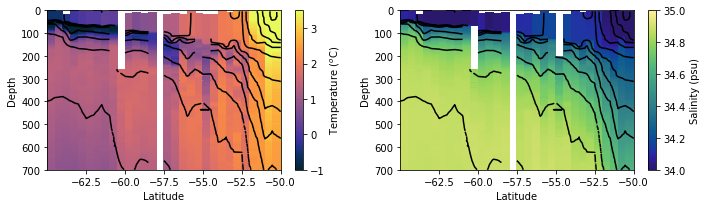

In [44]:
plt.figure(figsize=(10, 3))

n1 =14 
n2 = 45

plt.subplot(121)
plt.pcolormesh(cruise_ds_int.lat.isel(cast_num=slice(n1,n2)),
               cruise_ds_int.pressure.sel(pressure=slice(0,700)),
               cruise_ds_int.temperature.T.isel(cast_num=slice(n1,n2)).sel(pressure=slice(0,700)),
               vmin=-1, vmax=3.5, cmap=cmocean.cm.thermal, rasterized=True)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Temperature ($^o$C)')
plt.contour(cruise_ds_int.lat.isel(cast_num=slice(n1,n2)),
               cruise_ds_int.pressure.sel(pressure=slice(0,700)),
               cruise_ds_int.sigma0.T.isel(cast_num=slice(n1,n2)).sel(pressure=slice(0,700)),
                levels=12, colors='k')
plt.xlabel('Latitude')
plt.ylabel('Depth')
plt.gca().invert_yaxis()

plt.subplot(122)
plt.pcolormesh(cruise_ds_int.lat.isel(cast_num=slice(n1,n2)),
               cruise_ds_int.pressure.sel(pressure=slice(0,700)),
               cruise_ds_int.salinity.T.isel(cast_num=slice(n1,n2)).sel(pressure=slice(0,700)),
               vmin=34, vmax=35, cmap=cmocean.cm.haline, rasterized=True)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Salinity (psu)')
plt.contour(cruise_ds_int.lat.isel(cast_num=slice(n1,n2)),
               cruise_ds_int.pressure.sel(pressure=slice(0,700)),
               cruise_ds_int.sigma0.T.isel(cast_num=slice(n1,n2)).sel(pressure=slice(0,700)),
                levels=12, colors='k')
plt.gca().invert_yaxis()
plt.xlabel('Latitude')
plt.ylabel('Depth')
plt.tight_layout()
plt.savefig('TSsigma_I6.pdf')